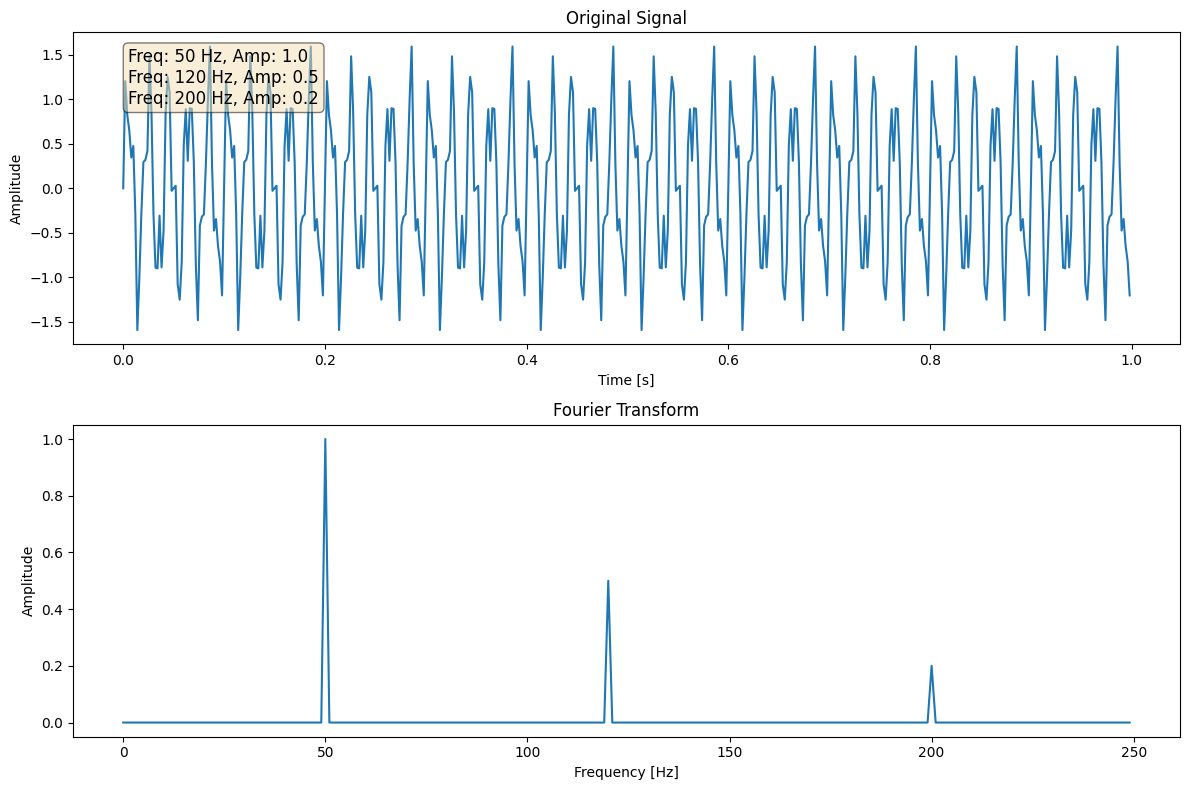

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def generateFunction(t, freqs, amplitudes):
    signal = np.zeros_like(t)
    for freq, amp in zip(freqs, amplitudes):
        signal += amp * np.sin(2 * np.pi * freq * t)
    return signal

# input parameters
samplingRate = 500
T = 1.0 
N = int(T * samplingRate) 
t = np.linspace(0, T, N, endpoint=False)

# frequencies and amplitues in the siganl
freqs = [50, 120, 200] 
amplitudes = [1.0, 0.5, 0.2] 

# Generate signal
signal = generateFunction(t, freqs, amplitudes)

# Compute Fourier Transform
yf = fft(signal)
xf = fftfreq(N, 1 / samplingRate)[:N//2]


fig, axs = plt.subplots(2, 1, figsize=(12, 8))

textstr = '\n'.join([f'Freq: {freq} Hz, Amp: {amp}' for freq, amp in zip(freqs, amplitudes)])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs[0].text(0.05, 0.95, textstr, transform=axs[0].transAxes, fontsize=12,
            verticalalignment='top', bbox=props)


axs[0].plot(t, signal)
axs[0].set_title('Original Signal')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')

axs[1].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
axs[1].set_title('Fourier Transform')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.savefig("FTExample.png")
plt.show()


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def dft(x):
    """
    Perform the Discrete Fourier Transform (DFT) on a vector x.
    
    Parameters:
    x (np.ndarray): The input vector
    
    Returns:
    np.ndarray: The DFT of the input vector
    """
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    exponent = -2j * np.pi * k * n / N
    return 1/(N**0.5)*np.dot(np.exp(exponent), x)

# Example usage
x = np.array([1,0])  # Example input vector

# Compute the DFT
X = dft(x)

print(X)




[0.70710678+0.j 0.70710678+0.j]
